In [11]:
import anndata
import pandas as pd
import scanpy as sc
from scButterfly.butterfly import Butterfly
print(dir(Butterfly))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'augmentation', 'construct_model', 'data_preprocessing', 'load_data', 'test_model', 'train_model']


In [12]:
butterfly = Butterfly()

In [13]:
# Load the ATAC and RNA data
ATAC_6419_A = anndata.read_h5ad("./data/Glioblastoma/ATAC_6419_A.h5ad")
RNA_6419_A = anndata.read_h5ad("./data/Glioblastoma/RNA_6419_A.h5ad")

# Verify the loaded data
print(ATAC_6419_A)
print(RNA_6419_A)

AnnData object with n_obs × n_vars = 8235 × 164987
    obs: 'nCount_RNA', 'nFeature_RNA', 'Region', 'Pct_mito', 'Sample', 'Batch', 'Patient', 'CellClass_L1', 'CellClass_L2', 'CellClass_L3', 'Platform', 'CCI_CellClass_L2', 'Confident_Annotation', 'is_malignant_confident', 'scVI_snn_res.0.5'
    var: 'gene_name', 'gene_type', 'gene_location', 'gene_start', 'gene_end'
AnnData object with n_obs × n_vars = 8235 × 36601
    obs: 'nCount_RNA', 'nFeature_RNA', 'Region', 'Pct_mito', 'Sample', 'Batch', 'Patient', 'CellClass_L1', 'CellClass_L2', 'CellClass_L3', 'Platform', 'CCI_CellClass_L2', 'Confident_Annotation', 'is_malignant_confident', 'scVI_snn_res.0.5'
    var: 'gene_name', 'gene_type', 'gene_location', 'gene_start', 'gene_end'


In [14]:
from scButterfly.split_datasets import *
id_list = five_fold_split_dataset(RNA_data=RNA_6419_A, ATAC_data=ATAC_6419_A)
train_id, validation_id, test_id = id_list[4]

In [15]:
butterfly.load_data(RNA_data=RNA_6419_A, ATAC_data=ATAC_6419_A, train_id=train_id, test_id=test_id, validation_id=validation_id)

[INFO] Butterfly: successfully load in data with

RNA data:
AnnData object with n_obs × n_vars = 8235 × 36601
    obs: 'nCount_RNA', 'nFeature_RNA', 'Region', 'Pct_mito', 'Sample', 'Batch', 'Patient', 'CellClass_L1', 'CellClass_L2', 'CellClass_L3', 'Platform', 'CCI_CellClass_L2', 'Confident_Annotation', 'is_malignant_confident', 'scVI_snn_res.0.5'
    var: 'gene_name', 'gene_type', 'gene_location', 'gene_start', 'gene_end'

ATAC data:
AnnData object with n_obs × n_vars = 8235 × 164987
    obs: 'nCount_RNA', 'nFeature_RNA', 'Region', 'Pct_mito', 'Sample', 'Batch', 'Patient', 'CellClass_L1', 'CellClass_L2', 'CellClass_L3', 'Platform', 'CCI_CellClass_L2', 'Confident_Annotation', 'is_malignant_confident', 'scVI_snn_res.0.5'
    var: 'gene_name', 'gene_type', 'gene_location', 'gene_start', 'gene_end'
[INFO] Butterfly: successfully load in data with

RNA data:
AnnData object with n_obs × n_vars = 8235 × 36601
    obs: 'nCount_RNA', 'nFeature_RNA', 'Region', 'Pct_mito', 'Sample', 'Batch', 'Pa

In [16]:
butterfly.data_preprocessing()

[INFO] RNA preprocessing: normalize size factor.
[INFO] RNA preprocessing: log transform RNA data.
[INFO] RNA preprocessing: choose top 3000 genes for following training.
[INFO] ATAC preprocessing: binarizing data.
[INFO] ATAC preprocessing: filter out peaks appear lower than 0.5% cells.
[INFO] ATAC preprocessing: TF-IDF transformation.
[INFO] ATAC preprocessing: normalizing data.


In [17]:
butterfly.ATAC_data_p.var.gene_location

gene_id
chr1:181048-181703        chr1
chr1:191028-191940        chr1
chr1:629495-630387        chr1
chr1:633523-634494        chr1
chr1:778275-779192        chr1
                          ... 
chrY:11332855-11333560    chrY
chrY:11333683-11334336    chrY
chrY:56836395-56837250    chrY
chrY:56850397-56851298    chrY
chrY:56870710-56871476    chrY
Name: gene_location, Length: 159083, dtype: category
Categories (24, object): ['chr1', 'chr2', 'chr3', 'chr4', ..., 'chr21', 'chr22', 'chrX', 'chrY']

In [18]:
chrom_list = []
last_one = ''
for i in range(len(butterfly.ATAC_data_p.var.gene_location)):
    temp = butterfly.ATAC_data_p.var.gene_location[i]
    if temp[0 : 3] == 'chr':        #if the chromosome name starts with 'chr'
        if not temp == last_one:    #if chrom name =/= last chrom name
            chrom_list.append(1)    #add new element to chrom_list
            last_one = temp         #update last chrom name to compare with next
        else:                       #if chrom name stays the same
            chrom_list[-1] += 1     #add another peak to last chrom in chrom_list
    else:                           #if the chromosome name does not start with 'chr'
        chrom_list[-1] += 1         #add another peak to last chrom in chrom_list

print(chrom_list, end="")           #no. peaks per chromosome
print(sum(chrom_list))

[14418, 7714, 8610, 7855, 4530, 5126, 5077, 5396, 6482, 3861, 4744, 13140, 4433, 1786, 3092, 10474, 7477, 9421, 8905, 8417, 7792, 6677, 3642, 14]159083


In [19]:
butterfly.augmentation(aug_type=None)

In [20]:
butterfly.construct_model(chrom_list)

[INFO] Butterfly: successfully construct butterfly model.
[INFO] Butterfly: successfully construct butterfly model.


In [11]:
trained_model=butterfly.train_model(output_path='./data/Glioblastoma', logging_path='./data/Glioblastoma')

[INFO] Butterfly: training butterfly model ...
[INFO] Trainer: RNA pretraining ...
RNA pretrain: 100%|█████████████████████| 100/100 [27:22<00:00, 16.43s/it, train=0.0470, val=0.0483]
[INFO] Trainer: ATAC pretraining ...
ATAC pretrain: 100%|████████████████████| 100/100 [27:45<00:00, 16.65s/it, train=0.0130, val=0.0131]
[INFO] Trainer: Integrative training ...
Integrative training:  80%|██████████▍  | 160/200 [55:53<13:58, 20.96s/it, train=0.1184, val=0.1090]


In [9]:
help(butterfly.test_model)

Help on method test_model in module scButterfly.butterfly:

test_model(batch_size=64, model_path=None, load_model=False, output_path=None, test_cluster=False, test_figure=False, output_data=False) method of scButterfly.butterfly.Butterfly instance
    Test for model.
    
    Parameters
    ----------
    model_path: str
        path for load trained model, default None.
        
    load_model: bool
        load the pretrained model or not, default False.
        
    output_path: str
        file path for model output, default None.
        
    test_cluster: bool
        test clustrer index or not, default False.
        
    test_figure: bool
        test tSNE or not, default False.
        
    output_data: bool
        output the predicted test data to file or not, default False.



In [21]:
A2R_predict, R2A_predict = butterfly.test_model(model_path='./data/Glioblastoma', load_model=True)

[INFO] Butterfly: testing butterfly model ...
[INFO] Butterfly: testing butterfly model ...
[INFO] Tester: load trained model from path: ./data/Glioblastoma/model
[INFO] Tester: get predicting ...
ATAC to RNA predicting...: 100%|████████████████████████████████████| 26/26 [00:05<00:00,  5.14it/s]
[INFO] Tester: calculate neighbors graph for following test ...


In [22]:
from scButterfly.calculate_cluster import calculate_cluster_index

In [ ]:
#sc.pp.normalize_total(adata_6419_A, target_sum=1e6)
#sc.pp.log1p(adata_6419_A)
#sc.pp.highly_variable_genes(adata_6419_A, n_top_genes=3000)


# Compute PCA
#sc.tl.pca(adata_6419_A)

# Compute the neighborhood graph
#sc.pp.neighbors(adata_6419_A)

# Compute UMAP
#sc.tl.umap(adata_6419_A)

# Plot UMAP with CellClass_L2 as the color
#sc.pl.umap(adata_6419_A, color='CellClass_L2')

In [23]:
print(A2R_predict.obs.columns)

Index(['nCount_RNA', 'nFeature_RNA', 'Region', 'Pct_mito', 'Sample', 'Batch',
       'Patient', 'CellClass_L1', 'CellClass_L2', 'CellClass_L3', 'Platform',
       'CCI_CellClass_L2', 'Confident_Annotation', 'is_malignant_confident',
       'scVI_snn_res.0.5'],
      dtype='object')


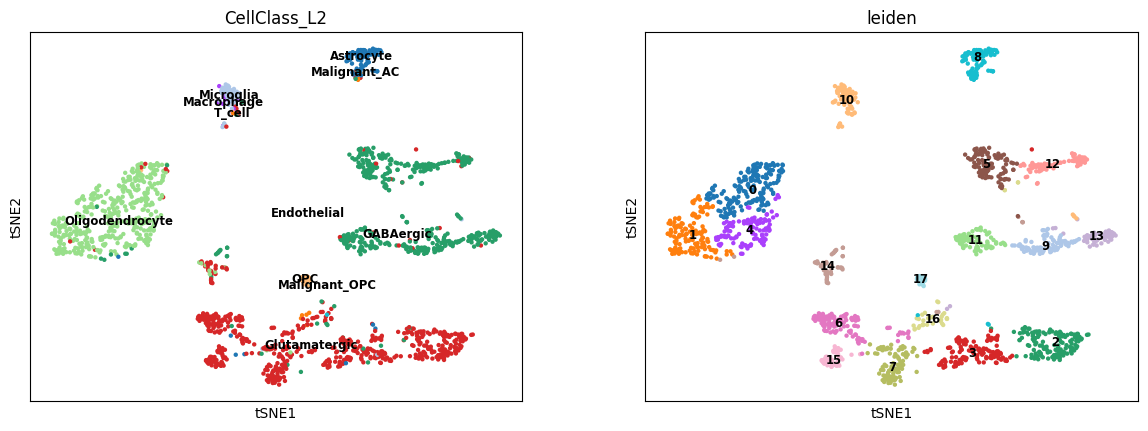

In [24]:
sc.tl.tsne(A2R_predict)
sc.tl.leiden(A2R_predict)
sc.pl.tsne(A2R_predict, color=['CellClass_L2', 'leiden'], legend_loc='on data', legend_fontsize='small', size=40)

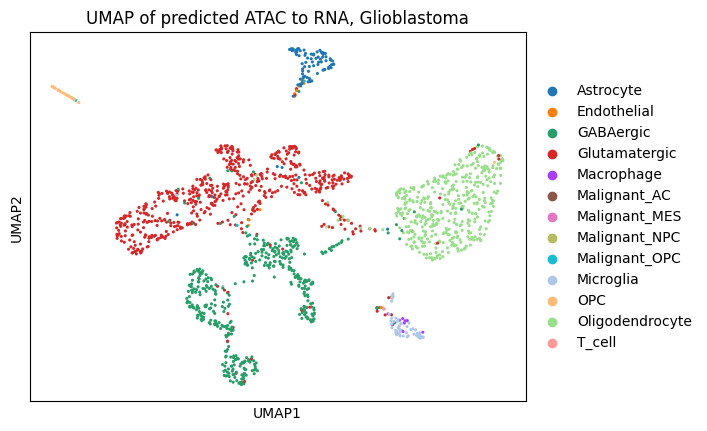

In [27]:
sc.tl.umap(A2R_predict)
sc.tl.leiden(A2R_predict)
sc.pl.umap(A2R_predict, color=['CellClass_L2'], size=20, title='UMAP of predicted ATAC to RNA, Glioblastoma')    #legend_loc='on data', legend_fontsize='small',

In [28]:
ATAC_6419_A.obs

,nCount_RNA,nFeature_RNA,Region,Pct_mito,Sample,Batch,Patient,CellClass_L1,CellClass_L2,CellClass_L3,Platform,CCI_CellClass_L2,Confident_Annotation,is_malignant_confident,scVI_snn_res.0.5
AAACAGCCAACTAGAA-1,6414.0,2733.0,PT,0.003736,6419_A,Batch_4,6419.0,OPC,OPC,OPC,Multiome,OPC,True,False,21.0
AAACAGCCAAGCGAGC-1,4711.0,2344.0,PT,0.013712,6419_A,Batch_4,6419.0,Myeloid,Microglia,CXCR4.Inflammatory,Multiome,Myeloid_Inflammatory,True,False,4.0
AAACAGCCACCCACAG-1,14007.0,4304.0,PT,0.003334,6419_A,Batch_4,6419.0,Neuron,GABAergic,GABAergic,Multiome,GABAergic,True,False,18.0
AAACAGCCACCTGGTG-1,2533.0,1404.0,PT,0.025321,6419_A,Batch_4,6419.0,Oligodendrocyte,Oligodendrocyte,Oligodendrocyte,Multiome,Oligodendrocyte,True,False,20.0
AAACAGCCATAATGTC-1,6802.0,2601.0,PT,0.022526,6419_A,Batch_4,6419.0,Oligodendrocyte,Oligodendrocyte,Oligodendrocyte,Multiome,Oligodendrocyte,True,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTCAAAGGG-1,6133.0,2651.0,PT,0.001422,6419_A,Batch_4,6419.0,Neuron,GABAergic,GABAergic,Multiome,GABAergic,True,False,19.0
TTTGTTGGTCATGAGC-1,5220.0,2195.0,PT,0.007666,6419_A,Batch_4,6419.0,Oligodendrocyte,Oligodendrocyte,Oligodendrocyte,Multiome,Oligodendrocyte,True,False,1.0
TTTGTTGGTTAACGAT-1,4507.0,2196.0,PT,0.016204,6419_A,Batch_4,6419.0,Oligodendrocyte,Oligodendrocyte,Oligodendrocyte,Multiome,Oligodendrocyte,True,False,20.0
TTTGTTGGTTCGGGAT-1,11613.0,4307.0,PT,0.004641,6419_A,Batch_4,6419.0,Neuron,Glutamatergic,Glutamatergic,Multiome,Glutamatergic,True,False,8.0


In [ ]:
ARI, AMI, NMI, HOM = calculate_cluster_index(R2A_predict)
print('RNA to ATAC:\nARI: %.3f, \tAMI: %.3f, \tNMI: %.3f, \tHOM: %.3f' % (ARI, AMI, NMI, HOM))

RNA to ATAC:
ARI: 0.949, 	AMI: 0.951, 	NMI: 0.954, 	HOM: 0.954


In [ ]:
ARI, AMI, NMI, HOM = calculate_cluster_index(A2R_predict)
print('ATAC to RNA:\nARI: %.3f, \tAMI: %.3f, \tNMI: %.3f, \tHOM: %.3f' % (ARI, AMI, NMI, HOM))

ATAC to RNA:
ARI: 0.636, 	AMI: 0.825, 	NMI: 0.839, 	HOM: 1.000
